In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import ExtraTreesRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, mean_squared_error


In [2]:
billing = pd.read_csv('NoSurpriseBillingER.csv')

In [3]:
billing.head()

,States,Billing Protections,Spending_Per_Person_ER,Out_of_Pocket_Spending_Per_Person_ER,Visits_Per_1000_People_ER,Average_Price_ER,Average_Out_of_Pocket_Price_ER,Percent of ER Visits with OON Providers,Malpractice payment amount per physician,Specialists per state,...,65+,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Cost of Living,Total HHI_Health Insurance,Total HHI_Hospital Inpatient Services
0,Arkansas,0,85.85,29.41,202.21,424.53,145.45,8.7,1754.84,52.22,...,17.3,42.0,5.4,26.2,15.9,1.4,9.1,86.9,3054,2739
1,California,1,233.12,46.62,126.25,1846.52,369.26,18.0,1693.24,52.89,...,14.9,48.0,6.6,25.3,11.4,0.9,7.8,151.7,2161,13407
2,Connecticut,1,240.31,60.05,165.11,1455.48,363.70,7.1,4810.00,56.83,...,17.7,52.9,4.8,21.5,14.1,0.7,5.9,127.7,2193,3136
3,Florida,1,241.76,56.06,194.89,1240.50,287.67,29.8,4936.99,53.04,...,21.1,40.3,9.5,17.4,18.0,1.7,13.1,97.9,2358,3382
4,Illinois,1,156.13,40.34,183.42,851.21,219.91,8.7,5711.64,49.65,...,16.0,54.6,5.2,18.2,14.1,0.7,7.3,94.5,3913,3898


In [4]:
billing.columns

Index(['States', 'Billing Protections', 'Spending_Per_Person_ER',
       'Out_of_Pocket_Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER',
       'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services'],
      dtype='object')

In [5]:
correlation_table = billing[['States', 'Billing Protections', 
       'Out_of_Pocket_Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']]

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
correlation_table.corr()



,Billing Protections,Out_of_Pocket_Spending_Per_Person_ER,Visits_Per_1000_People_ER,Percent of ER Visits with OON Providers,Malpractice payment amount per physician,Specialists per state,White,Black,Hispanic,Asian,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Employer,Medicaid,Medicare,Military,Uninsured,Cost of Living,Total HHI_Health Insurance,Total HHI_Hospital Inpatient Services
Billing Protections,1.000000,-0.131633,-0.560979,-0.053942,0.351715,0.059426,-0.319000,-0.142478,0.492395,0.581249,-0.636194,-0.486578,0.119583,0.745802,0.390204,0.341763,0.163156,0.023147,0.056044,-0.504167,-0.393656,0.762194,-0.416239,0.086674
Out_of_Pocket_Spending_Per_Person_ER,-0.131633,1.000000,0.178392,0.259014,0.011256,-0.277765,0.235148,-0.456392,0.024463,-0.230077,0.114640,0.210815,-0.247261,-0.437734,-0.020013,0.055352,0.033922,-0.324531,0.117947,0.130542,0.378299,-0.178515,-0.007209,0.053222
Visits_Per_1000_People_ER,-0.560979,0.178392,1.000000,0.445587,0.028004,-0.112765,0.201714,0.407891,-0.582541,-0.637357,0.109820,-0.123832,-0.445904,-0.494021,0.141929,0.155416,-0.462600,0.108908,0.385196,0.597451,0.522768,-0.718777,0.759017,-0.476902
Percent of ER Visits with OON Providers,-0.053942,0.259014,0.445587,1.000000,0.222827,0.110849,-0.420568,0.210339,0.316419,0.110774,0.012714,-0.025037,-0.013833,-0.086951,-0.061364,0.072961,-0.486827,0.224478,0.078067,0.288219,0.484223,-0.177787,0.265021,0.050722
Malpractice payment amount per physician,0.351715,0.011256,0.028004,0.222827,1.000000,0.222861,-0.402511,0.264823,0.281717,0.278108,-0.150691,-0.126012,0.170070,0.276203,0.027593,0.026746,0.037435,0.106984,-0.099944,-0.459861,-0.089408,0.207449,-0.038690,-0.386810
Specialists per state,0.059426,-0.277765,-0.112765,0.110849,0.222861,1.000000,-0.304049,0.346138,0.128853,0.211073,0.135577,0.207212,0.265735,0.303035,-0.150764,-0.333884,0.108983,0.290802,-0.484977,-0.291623,-0.374906,0.276310,-0.132955,-0.113896
White,-0.319000,0.235148,0.201714,-0.420568,-0.402511,-0.304049,1.000000,-0.508988,-0.766485,-0.721337,-0.092746,-0.068805,-0.511415,-0.366784,0.309696,0.254286,0.189697,-0.320081,0.490551,0.135704,-0.114821,-0.440263,0.055635,-0.396368
Black,-0.142478,-0.456392,0.407891,0.210339,0.264823,0.346138,-0.508988,1.000000,-0.120272,-0.042389,0.035946,-0.215397,-0.011560,0.089130,0.012390,-0.011189,-0.375950,0.421309,-0.074396,0.308013,0.080766,-0.116720,0.476279,-0.212138
Hispanic,0.492395,0.024463,-0.582541,0.316419,0.281717,0.128853,-0.766485,-0.120272,1.000000,0.817663,0.048396,0.219546,0.527022,0.340047,-0.352844,-0.213933,0.028902,0.059262,-0.464906,-0.401016,0.049620,0.552415,-0.420604,0.620675
Asian,0.581249,-0.230077,-0.637357,0.110774,0.278108,0.211073,-0.721337,-0.042389,0.817663,1.000000,-0.087845,0.044245,0.591235,0.679656,-0.138718,-0.282255,0.229712,0.195554,-0.543153,-0.558385,-0.349062,0.792299,-0.402237,0.542484


In [12]:

billing.median()

C:\Users\589598\AppData\Local\Temp\1/ipykernel_10216/1167046430.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  billing.median()


Billing Protections                            1.00
Spending_Per_Person_ER                       191.91
Out_of_Pocket_Spending_Per_Person_ER          49.63
Visits_Per_1000_People_ER                    186.33
Average_Price_ER                             975.30
Average_Out_of_Pocket_Price_ER               263.40
Percent of ER Visits with OON Providers       12.30
Malpractice payment amount per physician    3600.36
Specialists per state                         52.89
White                                         65.70
Black                                         10.00
Hispanic                                      11.10
Asian                                          2.70
American Indian/Alaska Native                  0.30
Native Hawaiian/Other Pacific Islander         0.00
Multiple Races                                 2.40
Children 0-18                                 23.30
Adults 19-25                                   8.60
Adults 26-34                                  11.70
Adults 35-54

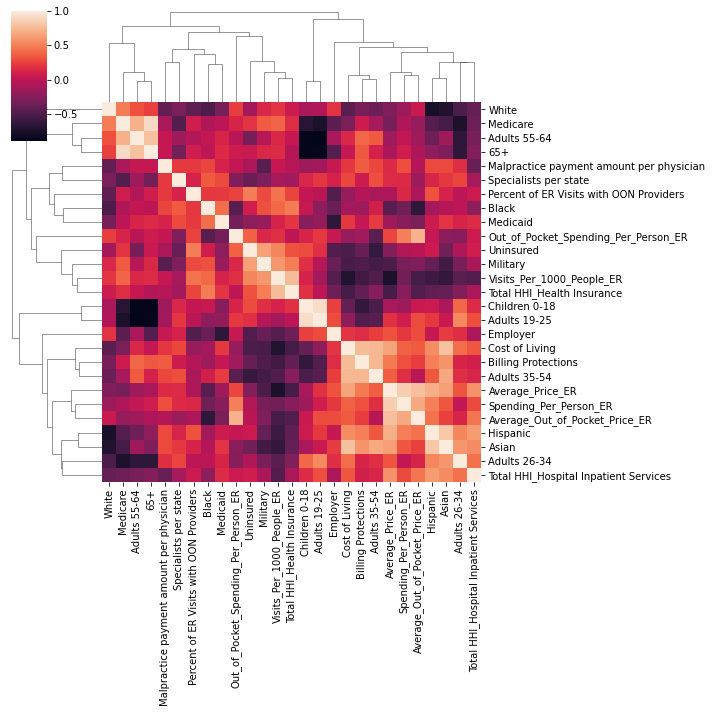

In [13]:
sns.clustermap(correlation_table.corr());

In [14]:
# Define X and y.
# 1st run
feature_cols = ['Out_of_Pocket_Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER', 'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Spending_Per_Person_ER'] 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
lr =LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [17]:
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.25797200905525725, 'Average_Price_ER'),
 (0.1412667605250384, 'Average_Out_of_Pocket_Price_ER'),
 (0.09376165187240312, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.04987223582262747, 'Native Hawaiian/Other Pacific Islander'),
 (0.046372542638501144, 'American Indian/Alaska Native'),
 (0.04622811349162062, 'Specialists per state'),
 (0.04057768919276182, 'Total HHI_Health Insurance'),
 (0.03286062441007063, 'Children 0-18'),
 (0.028502715468478313, 'Hispanic'),
 (0.02832727677330603, 'Cost of Living'),
 (0.02744899615331899, 'Medicaid'),
 (0.022267980196409905, 'White'),
 (0.020616705646158924, 'Multiple Races'),
 (0.016594550850379617, 'Adults 26-34'),
 (0.015317244297807198, 'Adults 55-64'),
 (0.01508416922546422, '65+'),
 (0.013570922050499442, 'Adults 35-54'),
 (0.012420255356378612, 'Non-Group'),
 (0.011251176685459425, 'Malpractice payment amount per physician'),
 (0.01122859125594653, 'Medicare'),
 (0.010826621705863182, 'Uninsured'),
 (0.009399377197905675, 'Visits_Per_1000

In [19]:
# Define X and y.
# 2nd run
feature_cols = ['Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER', 'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Out_of_Pocket_Spending_Per_Person_ER'] 

In [20]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.30973027705565, 'Average_Price_ER'),
 (0.0912155338878674, 'Spending_Per_Person_ER'),
 (0.0675700504910016, 'Average_Out_of_Pocket_Price_ER'),
 (0.05750211605340797, 'Cost of Living'),
 (0.055207774258697, 'Children 0-18'),
 (0.05520157205778472, 'Native Hawaiian/Other Pacific Islander'),
 (0.048438694728029474, 'Total HHI_Health Insurance'),
 (0.04745835101327914, 'American Indian/Alaska Native'),
 (0.04103939145291177, 'Specialists per state'),
 (0.02191352701361338, 'Hispanic'),
 (0.020503856987895273, 'Adults 55-64'),
 (0.018598291191039104, '65+'),
 (0.01550719936675034, 'Non-Group'),
 (0.014427403815023799, 'Visits_Per_1000_People_ER'),
 (0.013942904522196669, 'Medicare'),
 (0.013578825855482873, 'Adults 26-34'),
 (0.012871738969187705, 'Medicaid'),
 (0.012832648500312986, 'Multiple Races'),
 (0.01273938938158053, 'White'),
 (0.012263670975594972, 'Total HHI_Hospital Inpatient Services'),
 (0.011895716613907694, 'Percent of ER Visits with OON Providers'),
 (0.0086072697254978

In [21]:
# Define X and y.
# 3rd run
feature_cols = ['Spending_Per_Person_ER','Out_of_Pocket_Spending_Per_Person_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER', 'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Visits_Per_1000_People_ER'] 

In [22]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.30438881199588, 'Average_Price_ER'),
 (0.13529808226811066, 'Average_Out_of_Pocket_Price_ER'),
 (0.0838412684251529, 'Spending_Per_Person_ER'),
 (0.05319654218681723, 'American Indian/Alaska Native'),
 (0.04107025809321747, 'Total HHI_Health Insurance'),
 (0.0405779855418912, 'Specialists per state'),
 (0.03797967858631291, 'Cost of Living'),
 (0.033603182538352906, 'Native Hawaiian/Other Pacific Islander'),
 (0.029372887001054223, 'Medicaid'),
 (0.027224653778294725, 'Hispanic'),
 (0.02268850846624253, 'Adults 55-64'),
 (0.021336758267898857, 'Non-Group'),
 (0.015790009238509504, 'Multiple Races'),
 (0.015786500944697277, 'White'),
 (0.015304948536349595, 'Black'),
 (0.013745566921260978, 'Children 0-18'),
 (0.013649270614203828, '65+'),
 (0.013625803635646744, 'Adults 35-54'),
 (0.01206298761864374, 'Adults 26-34'),
 (0.010673246332307316, 'Medicare'),
 (0.009807804680460289, 'Asian'),
 (0.008920538627184942, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.008011518717229485, 'Perce

In [23]:
# Define X and y.
# 4th run
feature_cols = ['Visits_Per_1000_People_ER', 'Spending_Per_Person_ER','Out_of_Pocket_Spending_Per_Person_ER',
       'Average_Out_of_Pocket_Price_ER', 'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Average_Price_ER'] 

In [24]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.26938780762466363, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.14353376902429657, 'Average_Out_of_Pocket_Price_ER'),
 (0.1365078741289284, 'Visits_Per_1000_People_ER'),
 (0.05723633135499185, 'American Indian/Alaska Native'),
 (0.04512500149154422, 'Specialists per state'),
 (0.034155748190166195, 'Total HHI_Health Insurance'),
 (0.03186248801430221, 'Native Hawaiian/Other Pacific Islander'),
 (0.028213789385024942, 'Children 0-18'),
 (0.026267898698247055, 'Medicaid'),
 (0.021551194329198085, 'Hispanic'),
 (0.02134363418134147, 'White'),
 (0.018457481615009458, 'Non-Group'),
 (0.01480155041356147, 'Cost of Living'),
 (0.014391231107027416, 'Adults 55-64'),
 (0.013750381848126275, 'Adults 26-34'),
 (0.013266930216811112, 'Adults 35-54'),
 (0.012385969843897289, 'Spending_Per_Person_ER'),
 (0.011426475213570358, 'Multiple Races'),
 (0.011350015801401001, 'Malpractice payment amount per physician'),
 (0.01120712853553233, 'Employer'),
 (0.010991643182888899, 'Total HHI_Hospital Inpa

In [25]:
# Define X and y.
# 5th run
feature_cols = ['Visits_Per_1000_People_ER', 'Spending_Per_Person_ER','Out_of_Pocket_Spending_Per_Person_ER','Average_Price_ER'
       , 'Percent of ER Visits with OON Providers', 'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Average_Out_of_Pocket_Price_ER'] 

In [26]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.3099503303595204, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.1330161488698507, 'Visits_Per_1000_People_ER'),
 (0.11279535207657432, 'Average_Price_ER'),
 (0.08199730984873409, 'American Indian/Alaska Native'),
 (0.04029992292488159, 'Specialists per state'),
 (0.039457577887010875, 'Cost of Living'),
 (0.029523792150057074, 'Total HHI_Health Insurance'),
 (0.022950210761460373, 'White'),
 (0.022334340527507397, 'Medicaid'),
 (0.021862365450544027, 'Native Hawaiian/Other Pacific Islander'),
 (0.01846828346650018, 'Hispanic'),
 (0.018416413073400355, '65+'),
 (0.01792212967015244, 'Non-Group'),
 (0.01634965897303704, 'Adults 55-64'),
 (0.015490979227571498, 'Black'),
 (0.011537144542449376, 'Adults 35-54'),
 (0.01040890445644299, 'Multiple Races'),
 (0.008934093695537269, 'Medicare'),
 (0.008814847804610672, 'Adults 26-34'),
 (0.008631058169615291, 'Malpractice payment amount per physician'),
 (0.00802197765208435, 'Spending_Per_Person_ER'),
 (0.007489234691460862, 'Total HHI_Hospi

In [27]:
# Define X and y.
# 6th run
feature_cols = ['Visits_Per_1000_People_ER', 'Percent of ER Visits with OON Providers', 
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Spending_Per_Person_ER'] 

In [28]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.31182435368173, 'Malpractice payment amount per physician'),
 (0.11080746604302726, 'Specialists per state'),
 (0.10563396396407465, 'Visits_Per_1000_People_ER'),
 (0.05159054742224001, 'Children 0-18'),
 (0.05146951709037373, 'Hispanic'),
 (0.051280367398260536, 'Adults 35-54'),
 (0.04176389683032109, 'Adults 19-25'),
 (0.027623994868287403, 'Uninsured'),
 (0.017130472580679894, 'American Indian/Alaska Native'),
 (0.016785807101070197, 'Native Hawaiian/Other Pacific Islander'),
 (0.01654456910529394, 'Asian'),
 (0.01454062911595016, 'Adults 26-34'),
 (0.0139965422232512, 'Cost of Living'),
 (0.013226513858786738, '65+'),
 (0.011537698890567815, 'Military'),
 (0.011283913486148347, 'Percent of ER Visits with OON Providers'),
 (0.010954157993856305, 'Medicaid'),
 (0.010901795517007453, 'Black'),
 (0.008590475099298552, 'Non-Group'),
 (0.008109929905736644, 'Total HHI_Hospital Inpatient Services'),
 (0.0066894482023179104, 'White'),
 (0.0059737383290434255, 'Medicare'),
 (0.005429382

In [29]:
# Define X and y.
# 7th run
feature_cols = ['Billing Protections', 'Visits_Per_1000_People_ER','Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Spending_Per_Person_ER'] 

In [30]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.3202809203556204, 'Percent of ER Visits with OON Providers'),
 (0.09561728605486088, 'Billing Protections'),
 (0.08483913898357301, 'Malpractice payment amount per physician'),
 (0.056005315770109504, 'Multiple Races'),
 (0.048393721696925567, 'Black'),
 (0.045699715433733745, 'Adults 26-34'),
 (0.0358007691835986, 'Children 0-18'),
 (0.027416271998820754, 'Employer'),
 (0.026840692983560184, 'Total HHI_Hospital Inpatient Services'),
 (0.023427481511253886, 'Medicare'),
 (0.022947527894587108, 'Military'),
 (0.022594468510319148, 'Adults 19-25'),
 (0.019132186656625926, 'Adults 55-64'),
 (0.017857869853373592, 'Hispanic'),
 (0.01760665713143673, 'Non-Group'),
 (0.017075817327175658, 'American Indian/Alaska Native'),
 (0.012364462451637123, '65+'),
 (0.011199135117687518, 'Uninsured'),
 (0.00968892543738746, 'Native Hawaiian/Other Pacific Islander'),
 (0.007399146771386537, 'Visits_Per_1000_People_ER'),
 (0.007277985025681501, 'White'),
 (0.006908751594525932, 'Asian'),
 (0.00645652

In [37]:
# Define X and y.

feature_cols = ['Billing Protections', 'Visits_Per_1000_People_ER',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Spending_Per_Person_ER'] 

In [38]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.31414336921824165, 'Malpractice payment amount per physician'),
 (0.13222571667693667, 'Billing Protections'),
 (0.07629079961193654, 'Specialists per state'),
 (0.055556351900697735, 'Adults 35-54'),
 (0.051361695303157366, 'Hispanic'),
 (0.031055472950747853, 'Adults 55-64'),
 (0.024354538394532502, 'Adults 19-25'),
 (0.021883954389717606, 'Asian'),
 (0.01834283207726367, 'Employer'),
 (0.01701229816243073, 'Medicare'),
 (0.016049094052527895, 'Cost of Living'),
 (0.0159221736323583, 'Total HHI_Hospital Inpatient Services'),
 (0.014003412837668107, 'Military'),
 (0.013301363355324386, 'Uninsured'),
 (0.011982182249194492, '65+'),
 (0.009322379911082281, 'White'),
 (0.008015140971466533, 'Children 0-18'),
 (0.007831093957913074, 'Total HHI_Health Insurance'),
 (0.0068201257293078596, 'Visits_Per_1000_People_ER'),
 (0.006000950604719556, 'Black'),
 (0.005030768425609064, 'Adults 26-34'),
 (0.003959022478503543, 'Medicaid')]

In [35]:
# Define X and y.
# Final
# Only test to include in the writeup
feature_cols = ['Billing Protections', 'Visits_Per_1000_People_ER',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Out_of_Pocket_Spending_Per_Person_ER'] 



In [36]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.3087575731648567, 'Malpractice payment amount per physician'),
 (0.12406675908760484, 'Billing Protections'),
 (0.0919419873833929, 'Specialists per state'),
 (0.05700357046408392, 'Adults 35-54'),
 (0.04639513300536935, 'Hispanic'),
 (0.030796398607102184, 'Adults 55-64'),
 (0.030052874372321296, 'Adults 19-25'),
 (0.026918964709025484, 'Employer'),
 (0.02206864822141049, 'Asian'),
 (0.018425127676300466, 'Uninsured'),
 (0.01684746106657686, 'Military'),
 (0.016368608371560334, '65+'),
 (0.015439357131685896, 'Cost of Living'),
 (0.014542704215000082, 'Total HHI_Hospital Inpatient Services'),
 (0.011066933229407175, 'Medicare'),
 (0.010809135814652435, 'Visits_Per_1000_People_ER'),
 (0.009711529721512856, 'White'),
 (0.0080122942178687, 'Black'),
 (0.007696488915415151, 'Adults 26-34'),
 (0.0067931142008557585, 'Children 0-18'),
 (0.004351000091618239, 'Total HHI_Health Insurance'),
 (0.0035360613421312526, 'Medicaid')]

In [31]:
# Define X and y.


feature_cols = ['Billing Protections', 'Visits_Per_1000_People_ER',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Average_Price_ER'] 


In [32]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.4204927755325705, 'Malpractice payment amount per physician'),
 (0.0890898882433607, 'Specialists per state'),
 (0.0857861964040703, 'Billing Protections'),
 (0.03004035652261067, 'Adults 19-25'),
 (0.023793016697578974, '65+'),
 (0.023431198649095965, 'Military'),
 (0.022118359776351407, 'Hispanic'),
 (0.01842629716279599, 'Native Hawaiian/Other Pacific Islander'),
 (0.017829255806271524, 'Asian'),
 (0.01733722311029483, 'Adults 26-34'),
 (0.016195160921464457, 'Visits_Per_1000_People_ER'),
 (0.015726358163972408, 'Cost of Living'),
 (0.011292364552678007, 'Total HHI_Hospital Inpatient Services'),
 (0.011181548318123243, 'Medicaid'),
 (0.01067078302896546, 'Children 0-18'),
 (0.009207885159891965, 'Black'),
 (0.007527227571682412, 'Non-Group'),
 (0.006203062245271487, 'Employer'),
 (0.006083501585010863, 'American Indian/Alaska Native'),
 (0.005687766191371469, 'Total HHI_Health Insurance'),
 (0.005084081557647046, 'Multiple Races'),
 (0.004785880593582494, 'Adults 35-54'),
 (0.00

In [33]:
# Define X and y.
# 10th run

feature_cols = ['Billing Protections', 'Visits_Per_1000_People_ER',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Average_Out_of_Pocket_Price_ER'] 



In [34]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.4449005039148469, 'Malpractice payment amount per physician'),
 (0.12405681076226023, 'Specialists per state'),
 (0.059596172806043464, 'Billing Protections'),
 (0.03492001506732805, 'Adults 19-25'),
 (0.026891078103084987, 'Hispanic'),
 (0.01921168362792836, 'Adults 26-34'),
 (0.015570681205798078, 'Military'),
 (0.015432627695739326, 'Native Hawaiian/Other Pacific Islander'),
 (0.012981490670260061, 'Total HHI_Hospital Inpatient Services'),
 (0.012844855818444677, 'Cost of Living'),
 (0.012595485971337705, '65+'),
 (0.012519074748213664, 'Asian'),
 (0.012518375304976284, 'Uninsured'),
 (0.012054043741432308, 'Medicaid'),
 (0.010077485391069492, 'Total HHI_Health Insurance'),
 (0.010045560108362514, 'Visits_Per_1000_People_ER'),
 (0.008827601044251468, 'Adults 55-64'),
 (0.007369804696851202, 'Children 0-18'),
 (0.007328120291954791, 'Non-Group'),
 (0.006554861081469427, 'Employer'),
 (0.005512170968324269, 'American Indian/Alaska Native'),
 (0.005011001105807066, 'Black'),
 (0.00